In [1]:
import numpy as np
import importlib
from matplotlib import pyplot as plt
import pandas as pd
import math
import os
from scipy import stats
%matplotlib inline

import analyzer
import subject
import visualization
importlib.reload(analyzer)
importlib.reload(subject)
importlib.reload(visualization)

<module 'visualization' from '/Users/bang/workspace/iFEED_experiment_result_analysis_2019/visualization.py'>

Set file paths

In [2]:
rootPath = '/Users/bang/workspace/iFEED_experiment_result_analysis_2019/data'

In [3]:
surveyDataFilePath = os.path.join(rootPath, 'survey.csv')
loggedDataFilesRootPath = rootPath

Initialize the analyzer

In [4]:
resultAnalyzer = analyzer.ResultAnalyzer(surveyDataFilePath, loggedDataFilesRootPath)

In [5]:
resultAnalyzer.gradeAnswers(confidenceThreshold=10)

In [6]:
s0 = resultAnalyzer.subjects[0]
s1 = resultAnalyzer.subjects[1]
s2 = resultAnalyzer.subjects[2]
s3 = resultAnalyzer.subjects[3]
s4 = resultAnalyzer.subjects[4]
s5 = resultAnalyzer.subjects[5]
s6 = resultAnalyzer.subjects[6]


# Problem set scores

In [7]:
s0.printScoreSummary()

Subject: 5401038285006004819-9_15_19_13 - condition: 6
Fcl: 0.89, Fpwc: 0.56, Dcl: 0.78, Dpwc: 0.67


In [8]:
s1.printScoreSummary()

Subject: 3700789476005004819-9_16_15_58 - condition: 5
Fcl: 0.22, Fpwc: 0.33, Dcl: 0.67, Dpwc: 0.33


In [9]:
s2.printScoreSummary()

Subject: 3664515135004004819-9_20_14_13 - condition: 4
Fcl: 0.44, Fpwc: 0.67, Dcl: 0.44, Dpwc: 0.33


In [10]:
s3.printScoreSummary()

Subject: 3221520754006004819-10_2_6_8 - condition: 6
Fcl: 0.33, Fpwc: 0.44, Dcl: 0.67, Dpwc: 0.78


In [11]:
s4.printScoreSummary()

Subject: 5577734270005004819-10_4_13_54 - condition: 5
Fcl: 0.44, Fpwc: 0.56, Dcl: 0.67, Dpwc: 0.22


In [12]:
s5.printScoreSummary()

Subject: 1708104476004004819-10_8_16_14 - condition: 4
Fcl: 0.22, Fpwc: 0.56, Dcl: 0.44, Dpwc: 0.11


In [13]:
s6.printScoreSummary()

Subject: 5772081801006004819-10_10_13_3 - condition: 6
Fcl: 0.89, Fpwc: 0.67, Dcl: 1.0, Dpwc: 0.78


In [14]:
s0.printAggregateScore(combineFandD=True);

Subject: 5401038285006004819-9_15_19_13 - condition: 6
Total score: 0.73


In [15]:
s1.printAggregateScore(combineFandD=True);

Subject: 3700789476005004819-9_16_15_58 - condition: 5
Total score: 0.39


In [16]:
s2.printAggregateScore(combineFandD=True);

Subject: 3664515135004004819-9_20_14_13 - condition: 4
Total score: 0.47


In [17]:
s3.printAggregateScore(combineFandD=True);

Subject: 3221520754006004819-10_2_6_8 - condition: 6
Total score: 0.56


In [18]:
s4.printAggregateScore(combineFandD=True);

Subject: 5577734270005004819-10_4_13_54 - condition: 5
Total score: 0.47


In [19]:
print(s0.feature_classification_graded_answers)
print(s0.feature_comparison_graded_answers)
print(s0.design_classification_graded_answers)
print(s0.design_comparison_graded_answers)

[1, 1, 1, 1, 1, 1, 1, 0, 1]
[1, 0, 1, 0, 1, 1, 0, 0, 1]
[1, 1, 0, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 1]


In [20]:
print(s1.feature_classification_graded_answers)
print(s1.feature_comparison_graded_answers)
print(s1.design_classification_graded_answers)
print(s1.design_comparison_graded_answers)

[0, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 1, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 1, 0, 0, 0]


In [21]:
print(s2.feature_classification_graded_answers)
print(s2.feature_comparison_graded_answers)
print(s2.design_classification_graded_answers)
print(s2.design_comparison_graded_answers)

[0, 1, 0, 0, 0, 1, 1, 0, 1]
[0, 1, 0, 0, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 0, 0, 0, 1, 0]
[1, 1, 0, 0, 0, 0, 0, 1, 0]


In [22]:
print(s3.feature_classification_graded_answers)
print(s3.feature_comparison_graded_answers)
print(s3.design_classification_graded_answers)
print(s3.design_comparison_graded_answers)

[0, 0, 1, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 0, 0, 1, 1, 1, 1, 1]
[1, 0, 1, 1, 1, 1, 0, 1, 1]


# Positive/Negative Features

In [23]:
print(s0.gradePositiveFeatures())
print(s0.gradeNegativeFeatures())

(0.44, [1, 1, 0, 1, 0, 0, 1, 0, 0])
(1.0, [1, 1, 1, 1, 1, 1, 1, 1, 1])


In [24]:
print(s1.gradePositiveFeatures())
print(s1.gradeNegativeFeatures())

(0.22, [1, 0, 0, 0, 0, 0, 1, 0, 0])
(0.33, [0, 1, 0, 0, 0, 1, 1, 0, 0])


In [25]:
print(s2.gradePositiveFeatures())
print(s2.gradeNegativeFeatures())

(0.67, [0, 1, 0, 1, 1, 0, 1, 1, 1])
(0.44, [0, 1, 0, 0, 1, 0, 0, 1, 1])


In [26]:
print(s3.gradePositiveFeatures())
print(s3.gradeNegativeFeatures())

(0.11, [0, 0, 0, 0, 0, 0, 1, 0, 0])
(0.67, [0, 0, 1, 1, 1, 1, 1, 0, 1])


In [27]:
print(s4.gradePositiveFeatures())
print(s4.gradeNegativeFeatures())

(0.44, [0, 1, 0, 0, 1, 1, 1, 0, 0])
(0.56, [1, 1, 1, 0, 0, 0, 1, 1, 0])


# Get DataFrame

In [28]:
resultAnalyzer.getDataFrame()

,id,condition,fcl,fpwc,dcl,dpwc,FScore,DScore,PScore,NScore,HScore,LScore,totalScore
0,5401038285006004819-9_15_19_13,6,0.89,0.56,0.78,0.67,0.73,0.73,0.44,1.00,0.86,0.91,0.73
1,3700789476005004819-9_16_15_58,5,0.22,0.33,0.67,0.33,0.28,0.50,0.22,0.33,0.29,0.18,0.39
2,3664515135004004819-9_20_14_13,4,0.44,0.67,0.44,0.33,0.56,0.39,0.67,0.44,0.29,0.55,0.47
3,3221520754006004819-10_2_6_8,6,0.33,0.44,0.67,0.78,0.39,0.73,0.11,0.67,0.43,0.27,0.56
4,5577734270005004819-10_4_13_54,5,0.44,0.56,0.67,0.22,0.50,0.45,0.44,0.56,0.57,0.36,0.47
5,1708104476004004819-10_8_16_14,4,0.22,0.56,0.44,0.11,0.39,0.28,0.33,0.44,0.14,0.27,0.33
6,5772081801006004819-10_10_13_3,6,0.89,0.67,1.00,0.78,0.78,0.89,0.78,0.78,0.86,0.91,0.83


# Demographic data

In [29]:
s0.demographic_data

{'age': 33,
 'gender': 2,
 'education': 7,
 'major': 'Aerospace Engineering, Industrial / Systems Engineering',
 'employerType': 'For profit'}

In [30]:
s1.demographic_data

{'age': 34,
 'gender': 1,
 'education': 7,
 'major': 'Aerospace Engineering',
 'employerType': 'Academic institution'}

In [31]:
s2.demographic_data

{'age': 31,
 'gender': 1,
 'education': 7,
 'major': 'Aerospace Engineering, Electrical Engineering',
 'employerType': 'Non-profit (non-profit research organization, government contractor, etc.)'}

In [32]:
s3.demographic_data

{'age': 34,
 'gender': 1,
 'education': 7,
 'major': 'Aerospace Engineering, Industrial / Systems Engineering, Mathematics / Statistics',
 'employerType': 'Non-profit (non-profit research organization, government contractor, etc.)'}

In [33]:
s4.demographic_data

{'age': 36,
 'gender': 1,
 'education': 7,
 'major': 'Aerospace Engineering',
 'employerType': 'Government'}

In [34]:
s5.demographic_data

{'age': 33,
 'gender': 1,
 'education': 7,
 'major': 'Other',
 'employerType': 'Academic institution'}

In [35]:
s0.printloggedDataSummary(task="learning_task")
print("\n")
s1.printloggedDataSummary(task="learning_task")
print("\n")
s2.printloggedDataSummary(task="learning_task")
print("\n")
s3.printloggedDataSummary(task="learning_task")

Subject: 5401038285006004819-9_15_19_13 - condition: 6
counter_design_viewed: 62
counter_feature_viewed: 42
counter_filter_used: 0
counter_local_search_run: 2
counter_generalization_run: 4
counter_generalization_selected: 3
features_found: 77


Subject: 3700789476005004819-9_16_15_58 - condition: 5
counter_design_viewed: 751
counter_feature_viewed: 9
counter_filter_used: 0
counter_local_search_run: 0
counter_generalization_run: 0
counter_generalization_selected: 0
features_found: 30


Subject: 3664515135004004819-9_20_14_13 - condition: 4
counter_design_viewed: 1018
counter_feature_viewed: 10
counter_filter_used: 21
counter_local_search_run: 0
counter_generalization_run: 0
counter_generalization_selected: 0
features_found: 0


Subject: 3221520754006004819-10_2_6_8 - condition: 6
counter_design_viewed: 34
counter_feature_viewed: 14
counter_filter_used: 0
counter_local_search_run: 4
counter_generalization_run: 4
counter_generalization_selected: 1
features_found: 77


In [36]:
s0.printloggedDataSummary(task="feature_synthesis_task")
print("\n")
s1.printloggedDataSummary(task="feature_synthesis_task")
print("\n")
s2.printloggedDataSummary(task="feature_synthesis_task")
print("\n")
s3.printloggedDataSummary(task="feature_synthesis_task")

Subject: 5401038285006004819-9_15_19_13 - condition: 6
counter_feature_viewed: 1
counter_filter_used: 8
features_found: 7


Subject: 3700789476005004819-9_16_15_58 - condition: 5
counter_feature_viewed: 0
counter_filter_used: 7
features_found: 6


Subject: 3664515135004004819-9_20_14_13 - condition: 4
counter_feature_viewed: 11
counter_filter_used: 9
features_found: 11


Subject: 3221520754006004819-10_2_6_8 - condition: 6
counter_feature_viewed: 4
counter_filter_used: 5
features_found: 5


In [37]:
s0.printloggedDataSummary(task="design_synthesis_task")
print("\n")
s1.printloggedDataSummary(task="design_synthesis_task")
print("\n")
s2.printloggedDataSummary(task="design_synthesis_task")
print("\n")
s3.printloggedDataSummary(task="design_synthesis_task")

Subject: 5401038285006004819-9_15_19_13 - condition: 6
counter_design_viewed: 28
counter_design_evaluated: 12
designs_evaluated: 12


Subject: 3700789476005004819-9_16_15_58 - condition: 5
counter_design_viewed: 62
counter_design_evaluated: 42
designs_evaluated: 42


Subject: 3664515135004004819-9_20_14_13 - condition: 4
counter_design_viewed: 38
counter_design_evaluated: 16
designs_evaluated: 16


Subject: 3221520754006004819-10_2_6_8 - condition: 6
counter_design_viewed: 33
counter_design_evaluated: 14
designs_evaluated: 14


# Get transcript comments

In [38]:
subjects_manual = resultAnalyzer.filterSubjects(condition=4)
subjects_auto = resultAnalyzer.filterSubjects(condition=5)

In [39]:
resultAnalyzer.getComments(resultAnalyzer.subjects, "problem_solving_task", "F_cl_5", displayParticipantID=True, displayKeyword=False)


['[3700789476005004819-9_16_15_58] Yes, correct...',
 '[3664515135004004819-9_20_14_13] I think this is true. Because dawn and dusk generate more power for the satellite.']

In [40]:
resultAnalyzer.getComments(subjects_manual, "problem_solving_task", "F", displayParticipantID=False, displayKeyword=True)


["[F_cl_1] So AERO_POL and HIRES_SOUND...So I'm not sure. So I just click one of the option and say confidence of 0.",
 '[F_cl_2] ...',
 "[F_cl_3] I think this is False... because SWIRSPEC is both visible and nocturnal (?), so it can be used both day and night. So I'll put the confidence level of 15.",
 "[F_cl_4] I'm not confident about this one... ",
 '[F_cl_5] I think this is true. Because dawn and dusk generate more power for the satellite.',
 '[F_cl_6] I think this is false. I think almost all the orbits had some satellites.',
 "[F_cl_7] I'm not sure of this...",
 "[F_cl_8] I'm not sure...",
 '[F_cl_9] I think I oberved most of the instrument - vegetation - to be in 600km, but not sure if it was INSAR or the other type of the vegetation instrument.',
 "[F_pwc_1] I'm not sure.",
 "[F_pwc_2] I think it's the first one.. but not 100% confident.",
 '[F_pwc_3] I think uh... lidars and radars should not be assigned to the same orbit. But I did not oberved it within this tutorial. So I wi

In [41]:
resultAnalyzer.getComments(subjects_auto, "problem_solving_task", "F_cl", displayParticipantID=False, displayKeyword=True)


['[F_cl_1] I think so...',
 "[F_cl_2] Honestly, I don't, in this case, I'm not referring to tradespace, and referring to what I know. ",
 '[F_cl_3] [inaudible] ...',
 '[F_cl_4] Yes that is true, I remember that.',
 '[F_cl_5] Yes, correct...',
 "[F_cl_6] This one, I don't know. I'm going to guess.",
 "[F_cl_7] No I remember that SAR_ALTIM was always on its own. But I don't remeber the orbit honestly. Well, I think it's false but not really confident.",
 "[F_cl_8] I don't know...",
 '[F_cl_9] [inaudible] I think [inaudible]']

In [42]:
resultAnalyzer.getComments(resultAnalyzer.subjects, "survey", "gpe", displayParticipantID=False, displayKeyword=True)


['[4_gpe] This one is way too many features to discuss [inaudible]',
 '[5_gpe] This is more useful, I think.',
 "[6_gpe] This one, it's about classes.",
 '[4_gpe] I think the first case is better because, it is short and it summarizes information more efficiently.',
 '[5_gpe] I think the first case filters out... uh... I think both are useful. Hmm... maybe the second case.',
 '[6_gpe] I think the first case carries more useful information.']

# Synthesis task data visualization

In [43]:
g1 = [s2, s5]
g2 = [s1, s4]
g3 = [s0, s3, s6]
# g3 = [s6]

In [44]:
visualizer = visualization.Visualizer(groups=[g1,g2,g3], groupNames=['Manual','Automated','Interactive'])

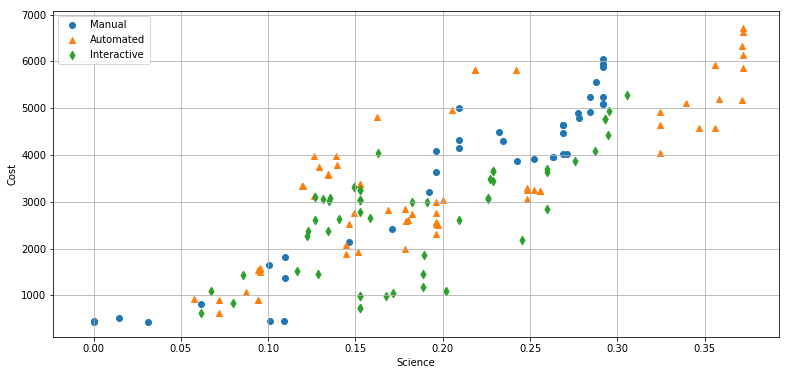

In [45]:
visualizer.designSynthesisScatter(markers=['o','^','d'])


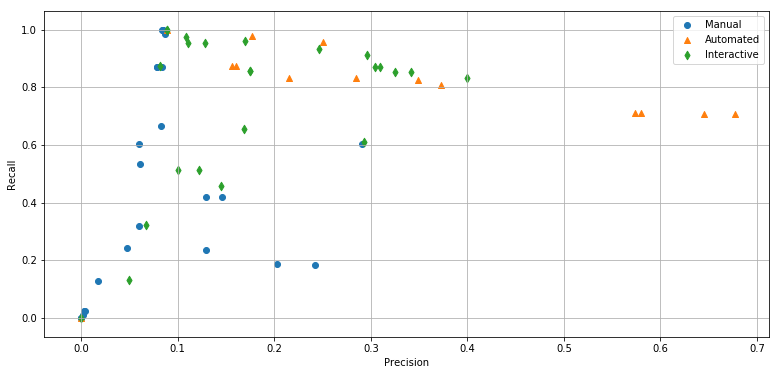

In [46]:
visualizer.featureSynthesisScatter(markers=['o','^','d'])


In [47]:
visualizer.setDataFrame(resultAnalyzer.getDataFrame())

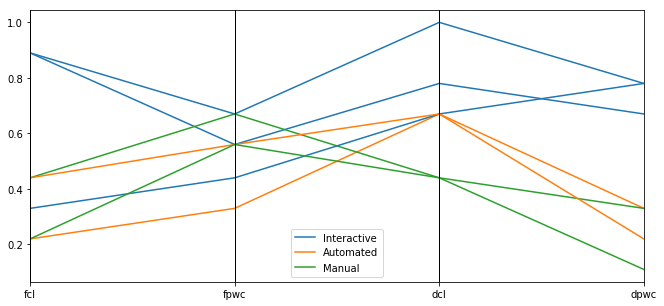

In [48]:
visualizer.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc'], 
                                figsize=(11,5),
                               legend=["Interactive","Automated","Manual"])

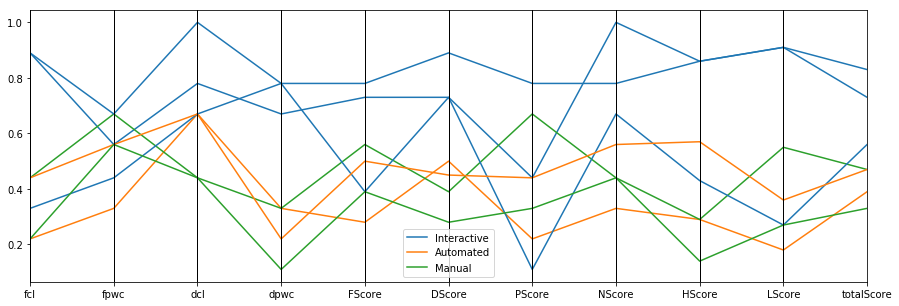

In [49]:
visualizer.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5),
                               legend=["Interactive","Automated","Manual"])

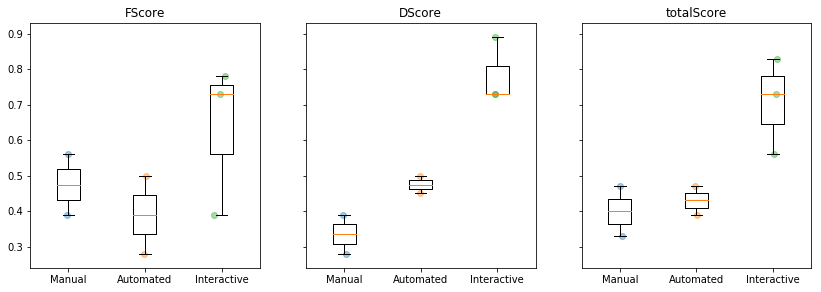

In [50]:
visualizer.boxPlot(columns=['FScore','DScore', 'totalScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

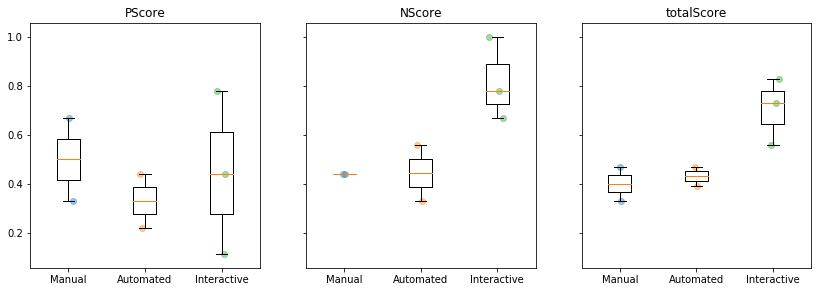

In [51]:
visualizer.boxPlot(columns=['PScore','NScore', 'totalScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

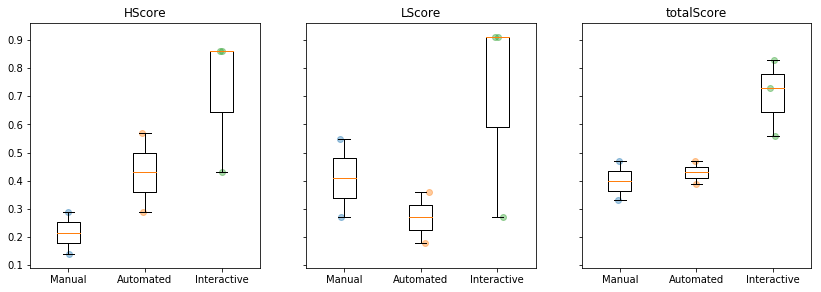

In [52]:
visualizer.boxPlot(columns=['HScore','LScore', 'totalScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

# Statistical tests

In [53]:
df = resultAnalyzer.getDataFrame()

In [62]:
df

,id,condition,fcl,fpwc,dcl,dpwc,FScore,DScore,PScore,NScore,HScore,LScore,totalScore
0,5401038285006004819-9_15_19_13,6,0.89,0.56,0.78,0.67,0.73,0.73,0.44,1.00,0.86,0.91,0.73
1,3700789476005004819-9_16_15_58,5,0.22,0.33,0.67,0.33,0.28,0.50,0.22,0.33,0.29,0.18,0.39
2,3664515135004004819-9_20_14_13,4,0.44,0.67,0.44,0.33,0.56,0.39,0.67,0.44,0.29,0.55,0.47
3,3221520754006004819-10_2_6_8,6,0.33,0.44,0.67,0.78,0.39,0.73,0.11,0.67,0.43,0.27,0.56
4,5577734270005004819-10_4_13_54,5,0.44,0.56,0.67,0.22,0.50,0.45,0.44,0.56,0.57,0.36,0.47
5,1708104476004004819-10_8_16_14,4,0.22,0.56,0.44,0.11,0.39,0.28,0.33,0.44,0.14,0.27,0.33
6,5772081801006004819-10_10_13_3,6,0.89,0.67,1.00,0.78,0.78,0.89,0.78,0.78,0.86,0.91,0.83


In [54]:
df_interactive = df.loc[df['condition'] == 6]
df_automated = df.loc[df['condition'] == 5]
df_manual = df.loc[df['condition'] == 4]

In [67]:
print(stats.ttest_ind(df_interactive['totalScore'], df_manual['totalScore']))
print(stats.ttest_ind(df_interactive['totalScore'], df_automated['totalScore']))

Ttest_indResult(statistic=2.6820143797423013, pvalue=0.07492051569852315)
Ttest_indResult(statistic=2.609512442862909, pvalue=0.07971848867244173)


In [66]:
print(stats.ttest_ind(df_interactive['DScore'], df_manual['DScore']))
print(stats.ttest_ind(df_interactive['DScore'], df_automated['DScore']))

Ttest_indResult(statistic=5.594865809996459, pvalue=0.01127926234620286)
Ttest_indResult(statistic=4.32263442068027, pvalue=0.0228189237556945)


In [68]:
print(stats.ttest_ind(df_interactive['NScore'], df_manual['NScore']))
print(stats.ttest_ind(df_interactive['NScore'], df_automated['NScore']))

Ttest_indResult(statistic=3.007546588450481, pvalue=0.05732346904976063)
Ttest_indResult(statistic=2.4489727104815637, pvalue=0.09176335554706658)


In [70]:
stats.f_oneway(df_interactive['totalScore'], df_automated['totalScore'],df_manual['totalScore'])

F_onewayResult(statistic=5.83819628647215, pvalue=0.06510700553422599)

# Survey results

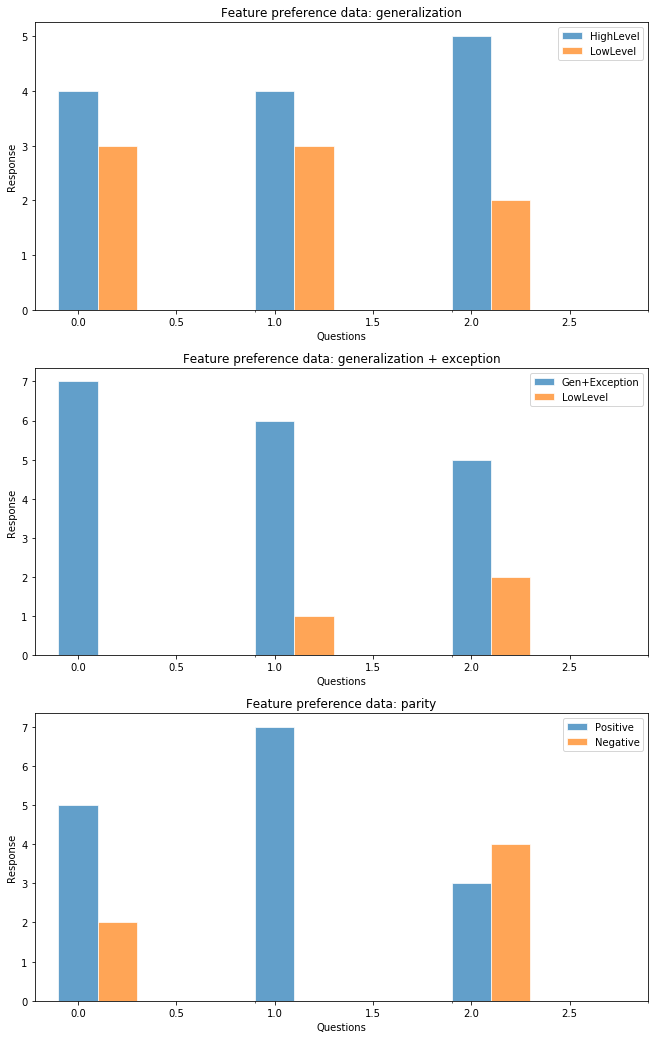

In [57]:
visualizer.featurePrefPlot(figsize=(11,18))

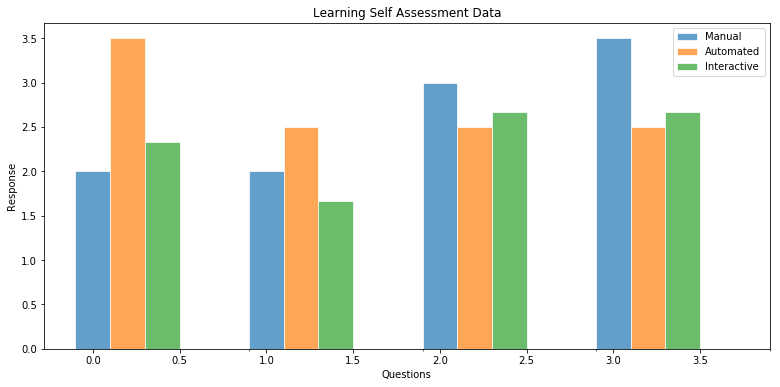

In [58]:
visualizer.selfAssessmentPlot()

In [59]:
die here

SyntaxError: invalid syntax (<ipython-input-59-c985d6ba8f59>, line 1)

In [ ]:
s0.learning_self_assessment_data

In [ ]:
s0.feature_preference_data

In [ ]:
s1.design_synthesis_task_data

In [ ]:
s2.feature_synthesis_task_data

In [ ]:
s2.design_synthesis_task_data

In [ ]:
# subjects = analyzer.filterSubjects(pretest_score_threshold=0.5)
subjects = None

means = []
stdevs = []

temp = []

for i in range(3):    
    data = analyzer.getScoreData(subjects=subjects, 
                                 condition_number=i, 
                                 exclude_first_task=True, 
                                 conf_min=0, 
                                 conf_max=100, 
                                 time_min=None)
    
    temp.append(data)

    mean = np.mean(data)
    stdev = np.std(data)
    standardError = stdev / math.sqrt(len(data))
    confInterval = st.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=st.sem(data))
    print("condition: {0}, mean: {1}, std: {2}, standardError: {3}".format(i, mean, stdev, standardError))
    
    means.append(mean)
    stdevs.append(stdev)

In [ ]:
np.shape(temp)

In [ ]:
st.ttest_ind(temp[0], temp[1])

In [ ]:
plotBarGraph(means[0], stdevs[0], means[1], stdevs[1], means[2], stdevs[2])

In [ ]:
def plotScatter(x1, x2, x3):
    plt.scatter(x1,x2, s=None, c=x3, alpha=0.5)
    plt.show()

In [ ]:
def plotBarGraph(mean1, stdev1, mean2, stdev2, mean3=None, stdev3=None):
    
    if mean3 is not None:
        N = 3
        means = (mean1, mean2, mean3)
        stdevs = (stdev1, stdev2, stdev3)
    
    else:
        N = 2
        means = (mean1, mean2)
        stdevs = (stdev1, stdev2)
        
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, means, width, color='skyblue', yerr=stdevs)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Scores')
    ax.set_title('Scores')
    
    if mean3 is not None:
        ax.set_xticks(ind + width / 3)
        ax.set_xticklabels(('1', '2', '3'))
        
    else:
        ax.set_xticks(ind + width / 2)
        ax.set_xticklabels(('1', '2'))

    #ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

    plt.show()

In [ ]:
def plotECDF(scores1,scores2):
    
    import statsmodels.api as sm # recommended import according to the docs

    sample = scores1
    ecdf = sm.distributions.ECDF(scores1)
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    plt.step(x, y)

    sample2 = scores2
    ecdf = sm.distributions.ECDF(sample2)
    x = np.linspace(min(sample2), max(sample2))
    y = ecdf(x)
    plt.step(x, y)

    plt.show()

In [ ]:
def writeToFile(data, header ,filePath = "/Users/bang/workspace/iFEED-experiment-201711-result/data/data.csv"):
    with open(filePath, 'w') as f:
        f.write(header + "\n")
        for row in data:
            f.write(",".join(row) + "\n")
    

# dataframe test

In [ ]:
df = resultAnalyzer.getDataFrame()

In [ ]:
df['fcl']

In [ ]:
df.loc[df['shield'] > 35] = 0

In [ ]:
df.boxplot(column=['fcl','fpwc','dcl','dpwc'])

In [ ]:
df.boxplot(by=["condition"], column=['PScore', 'NScore'], layout=None)